# A Simple Bar Chart Tutorial
In this tutorial I want to show you some of my tricks to turn a boring bar chart into a stunning vusial using `Matplotlib` and `Seaborn`.

In [1]:
import os
import tqdm
import imageio
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from matplotlib import font_manager
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, OffsetBox

In [2]:
df = pd.read_csv("./data.csv", index_col=None)
df = df.set_index("date")

In [3]:
df.reset_index().tail(3)

,date,tensorflow,pytorch,keras
2994,2023-06-09,175390,67675,58557
2995,2023-06-10,175428,67703,58561
2996,2023-06-11,175444,67719,58563


### Step 1: Creating a default bar chart

In [4]:
def create_bar_chart(row, color):    
    return sns.barplot(
        y=row.index.str.capitalize().values,
        x=row.values,
        orient="h",
        saturation=1,
        color=color,
        width=0.75,
    )

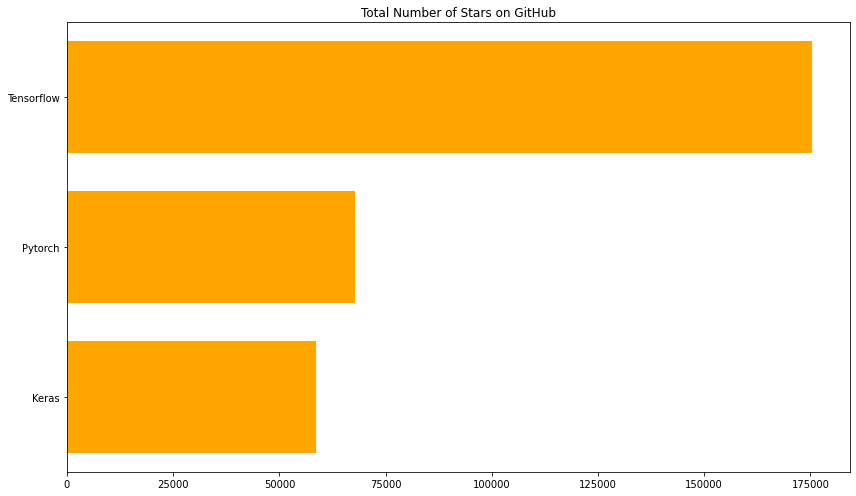

In [5]:
row = df.iloc[-1]

fig = plt.figure(figsize=(12, 7))
ax = create_bar_chart(row, color="orange")

plt.title("Total Number of Stars on GitHub")
plt.tight_layout()
plt.show()

### Step 2: Creating a theme


In [6]:
def set_seaborn_style(font_family, background_color, grid_color, text_color):
    sns.set_style({
        "axes.facecolor": background_color,
        "figure.facecolor": background_color,

        "grid.color": grid_color,
        "axes.edgecolor": grid_color,
        "axes.grid": True,
        "axes.axisbelow": True,
        
        "axes.labelcolor": text_color,
        "text.color": text_color,
        "font.family": font_family,
        "xtick.color": text_color,
        "ytick.color": text_color,

        "xtick.bottom": False,
        "xtick.top": False,
        "ytick.left": False,
        "ytick.right": False,

        "axes.spines.left": False,
        "axes.spines.bottom": True,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
)

Now you can create a color scheme that you like and select a font. I often go to https://colorhunt.co or https://www.canva.com/colors/color-palettes for inpiration and use https://coolors.co/ to find complementary colors when I've found base colors that I like.

Here are the colors I've selected for this tutorial.

In [7]:
background_color = "#2F195F"
grid_color = "#582FB1"
bar_color = "#835ED4"
text_color = "#eee"

In [8]:
def show_available_fonts():
    fonts = list(set([f.name for f in font_manager.fontManager.ttflist]))
    fonts.sort()
    return fonts

In [9]:
font_family = "PT Mono"

In [10]:
set_seaborn_style(font_family, background_color, grid_color, text_color)

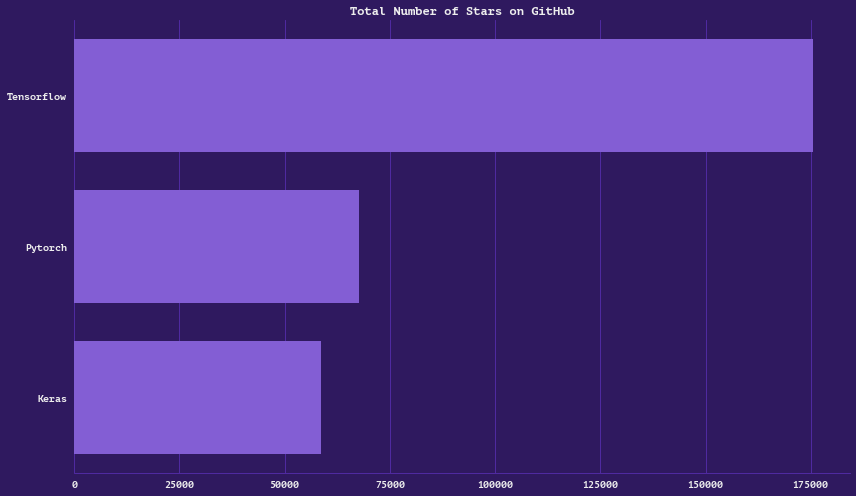

In [11]:
row = df.iloc[-1]

fig = plt.figure(figsize=(12, 7))
ax = create_bar_chart(row, color=bar_color)

plt.title("Total Number of Stars on GitHub")
plt.tight_layout()
plt.show()

### Step 3: Formatting axes and title

In [12]:
def format_axes(ax):
    ax.tick_params("x", labelsize=20, pad=16)
    ax.tick_params("y", labelsize=20, pad=8)
    
    plt.xticks(
        ticks=ax.get_xticks()[:-1],
        labels=["{}K".format(int(x / 1000)) for x in ax.get_xticks()[:-1]]
    )

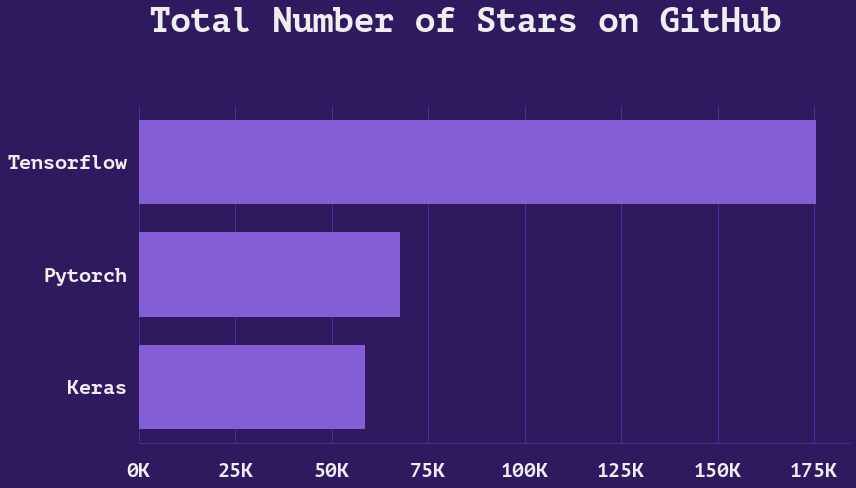

In [13]:
row = df.iloc[-1]

fig = plt.figure(figsize=(12, 7))
ax = create_bar_chart(row, color=bar_color)

format_axes(ax)

plt.title("Total Number of Stars on GitHub", fontsize=34, y=1.2, x=0.46)
plt.tight_layout()
plt.show()

### Step 4: Adding icons

In [14]:
def add_bar_icons(ax, row, background_color, zoom, pad):
    for index, (name, value) in enumerate(row.items()): 
        icon = plt.imread("./icons/{}.png".format(name.lower()))
        image = OffsetImage(icon, zoom=zoom, interpolation="lanczos", resample=True, visible=True)
        image.image.axes = ax

        ax.add_artist(AnnotationBbox(
            image, (value, index), frameon=True,
            xycoords="data",
            bboxprops={
                "facecolor": "#fff",
                "linewidth": 2.5,
                "edgecolor": background_color,
                "boxstyle": "circle, pad={}".format(pad),
            }
        ))

In [15]:
def add_icon(ax, icon_name, x, y):
    icon = plt.imread("./icons/{}.png".format(icon_name))
    image = OffsetImage(icon, zoom=0.13, interpolation="lanczos", resample=True, visible=True)
    image.image.axes = ax

    ax.add_artist(AnnotationBbox(
        image, (x, y), frameon=False,
        xycoords="axes fraction",
    ))

In [ ]:
row = df.iloc[-1]

fig = plt.figure(figsize=(12, 7))
ax = create_bar_chart(row, color=bar_color)

format_axes(ax)
add_bar_icons(ax, row, background_color, zoom=0.09, pad=1)
add_icon(ax, "star", 0.46, 1.26)

plt.title("Total Number of     Stars on GitHub", fontsize=34, y=1.2, x=0.46)
plt.tight_layout()
plt.show()

### Step 5: Turning the chart into an Image

In [ ]:
def create_image_from_figure(fig):
    plt.tight_layout()
    
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    data = data.reshape((fig.canvas.get_width_height()[::-1]) + (3,))
    plt.close() 
    
    return Image.fromarray(data)

def add_padding_to_chart(chart, left, top, right, bottom, background):
    size = chart.size
    image = Image.new("RGB", (size[0] + left + right, size[1] + top + bottom), background)
    image.paste(chart, (left, top))
    return image

In [ ]:
row = df.iloc[-1]

fig = plt.figure(figsize=(12, 7))
ax = create_bar_chart(row, color=bar_color)
plt.title("Total Number of     Stars on GitHub", fontsize=34, y=1.2, x=0.46)

format_axes(ax)
add_bar_icons(ax, row, background_color, zoom=0.09, pad=0.9)
add_icon(ax, "star", 0.46, 1.26)

image = create_image_from_figure(fig)
image = add_padding_to_chart(image, 20, 20, 40, 0, background_color)

In [ ]:
image

### Bonus: Creating an animation

In [ ]:
images = []

for i in tqdm.tqdm(range(1, 2000, 10)):
    row = df.iloc[-i]

    fig = plt.figure(figsize=(12, 7))
    ax = create_bar_chart(row, color=bar_color)
    ax.set(xlim=(0, 185000))
    plt.title("Total Number of     Stars on GitHub", fontsize=34, y=1.2, x=0.46)

    format_axes(ax)
    add_bar_icons(ax, row, background_color, zoom=0.09, pad=0.9)
    add_icon(ax, "star", 0.46, 1.26)

    image = create_image_from_figure(fig)
    image = add_padding_to_chart(image, 20, 20, 40, 0, background_color)
    images.append(image)
    
images.reverse()

In [ ]:
images = images + [images[-1] for _ in range(20)]
imageio.mimwrite('./animation.gif', images, duration=50)